# Pandas로 국민청원 데이터 분석하기

In [123]:
# 출력데이터가 지저분하게 보이지 않도록
import warnings
warnings.filterwarnings('ignore')

## Pandas와 NumPy를 import해 옵니다.

In [124]:
import pandas as pd
import numpy as np

In [125]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

# !apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt

# 마이너스 폰트 깨짐 현상 수정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
path = '/usr/share/fonts/truetype/naver-d2coding/D2Coding-Ver1.3.2-20180524-all.ttc'
font_name = fm.FontProperties(fname=path, size=15).get_name()
plt.rc('font', family=font_name)

In [126]:
from plotnine import *
import plotnine

## csv 데이터를 불러 옵니다.

In [127]:
petition_df = pd.read_csv('./data/petition.csv', encoding='utf-8', parse_dates=['start', 'end'])

## 읽어온 데이터가 몇 행 몇 열인지 봅니다.

In [128]:
petition_df.shape

(395547, 8)

## 일부 데이터 미리 보기
* 상단 5개의 데이터를 불러옵니다.

In [129]:
petition_df.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


* 하단 3개의 데이터를 불러옵니다.

In [130]:
petition_df.tail(3)

,article_id,start,end,answered,votes,category,title,content
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


## 결측치가 있는지 확인해 봅니다.

In [131]:
petition_df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

## 데이터 요약하기
* 어떤 컬럼이 있고 어떤 타입인지 출력해 봅니다.

In [132]:
petition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
article_id    395547 non-null int64
start         395547 non-null datetime64[ns]
end           395547 non-null datetime64[ns]
answered      395547 non-null int64
votes         395547 non-null int64
category      395547 non-null object
title         395547 non-null object
content       395546 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


* 데이터 타입만 따로 뽑아 봅니다.

In [133]:
petition_df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
dtype: object

* 컬럼명만 따로 추출해 봅니다.

In [134]:
petition_df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

* 수치형 데이터에 대한 요약을 봅니다.

In [135]:
petition_df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


* 카테고리(object) 형태의 데이터에 대한 요약을 봅니다.

In [136]:
petition_df.describe(include=np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


## 답변대상 청원 보기
20만건 이상 투표를 받으면 답변 대상 청원이 됩니다.<br/>20만건 이상 투표를 받은 청원의 갯수를 세어보세요.

In [137]:
petition_df[petition_df['votes'] >= 200000].count()

article_id    80
start         80
end           80
answered      80
votes         80
category      80
title         80
content       80
dtype: int64

* 20만건 이상 투표를 받은 상위 5개의 청원을 head()를 통해 출력해 보세요.

In [138]:
petition_df[petition_df['votes'] >= 200000].sort_values(by='votes', ascending=False).head()

,article_id,start,end,answered,votes,category,title,content
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달..."
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...


* 20만건 이상 투표를 받은 청원을 별도의 컬럼을 만들어 줍니다. 컬럼 이름은 `answer`로 합니다.

In [139]:
petition_answer = petition_df[petition_df['votes'] >= 200000]
petition_answer['answer'] = True

* df 데이터프레임의 크기를 다시 찍어 보세요. 컬럼 하나가 늘었나요?

In [140]:
petition_answer.shape

(80, 9)

* 새로 생성해 준 answer의 타입은 boolean 타입입니다. int로 변경해 보세요.

In [141]:
petition_answer['answer'].astype(int)

1752      1
10894     1
18111     1
25032     1
43992     1
         ..
363005    1
375654    1
390787    1
391208    1
391984    1
Name: answer, Length: 80, dtype: int64

* 답변대상 청원중 아직 답변되지 않은 청원의 수를 계산해 보세요.

In [142]:
petition_answer[(petition_answer['answered'] == 0)].count()

article_id    51
start         51
end           51
answered      51
votes         51
category      51
title         51
content       51
answer        51
dtype: int64

## 답변 대상 청원 중 투표를 가장 많이 받은 것

In [143]:
petition_no_answered = petition_answer[(petition_answer['answered'] == 0)]
petition_no_answered.sort_values(by='votes', ascending=False).head(1)

,article_id,start,end,answered,votes,category,title,content,answer
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True


## 어느 분야의 청원이 가장 많이 들어왔는지?
pandas의 value_counts로 특정 컬럼의 데이터를 그룹화하여 카운된 숫자를 볼 수 있습니다.<br/>
어느 분야의 청원이 가장 많이 들어왔는지 찾아보세요.

In [144]:
petition_grouped_category = petition_df.groupby(petition_df['category']).count()
petition_grouped_category.sort_values(by='article_id', ascending=False)['article_id']

category
정치개혁           62750
기타             48682
인권/성평등         34993
안전/환경          30638
교통/건축/국토       28184
외교/통일/국방       26626
육아/교육          25537
보건복지           24848
일자리            23225
행정             20268
문화/예술/체육/언론    18207
미래             18000
경제민주화          16793
성장동력            7253
반려동물            4057
저출산/고령화대책       3584
농산어촌            1902
Name: article_id, dtype: int64

## 청원이 가장 많이 들어 온 날은 언제인지 정렬해 보세요.
청원이 가장 많이 들어 온 날은 언제인지 정렬해 보세요.

In [145]:
petition_grouped_start = petition_df.groupby(petition_df['start']).count()
petition_grouped_start.sort_values(by='article_id', ascending=False)['article_id'].head()

start
2017-11-11    9623
2017-09-05    5952
2018-01-11    3368
2018-02-06    2631
2017-11-09    2487
Name: article_id, dtype: int64

## 피봇 테이블로 투표를 가장 많이 받은 분야를 찾아보세요.

In [146]:
petitions_unique = pd.pivot_table(petition_df, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
petitions_best[['category', 'votes']]

,category,votes
0,인권/성평등,12559348
1,안전/환경,6605175
2,정치개혁,6205013
3,기타,5190468
4,육아/교육,4475297
5,보건복지,4341211
6,문화/예술/체육/언론,4149796
7,외교/통일/국방,3696112
8,교통/건축/국토,2902330
9,반려동물,2066624


## 투표를 가장 많이 받은 날은 언제일까요?

In [147]:
petitions_start = pd.pivot_table(petition_df, index=['start'], aggfunc=np.sum)
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] >= 200000]['votes']

start
2018-10-17    1300523
2018-10-31     827096
2018-06-13     786157
2018-10-18     721524
2018-02-19     701520
               ...   
2018-09-18     210618
2018-08-19     207406
2018-04-24     207362
2018-04-13     206736
2018-07-17     206279
Name: votes, Length: 87, dtype: int64

## 청원을 많이 받은 날 VS 투표를 많이 받은 날에 대해 각각 상위 5개 목록을 추출해 봅니다. 
이때, title, content는 안 나와도 됩니다.

## 시계열 데이터 보기
* 월별 청원수를 집계해 보세요.

In [148]:
petition_df['start_month'] = petition_df['start'].dt.month
petition_df['start_day'] = petition_df['start'].dt.day
petition_df['start_hour'] = petition_df['start'].dt.hour
petition_df['start_dow'] = petition_df['start'].dt.dayofweek
petition_df.shape
petition_df['start_month'].value_counts()

1     52941
11    52847
9     40888
12    38498
10    31687
8     28851
2     28117
7     25714
5     25499
6     25483
4     23227
3     21795
Name: start_month, dtype: int64

* 청원이 가장 많이 들어온 달은 언제인가요?
* 요일별 청원 수는 어떻게 되나요?

In [149]:
petition_df['start_day'].value_counts()

11    22689
5     17307
6     14766
12    13983
24    13461
9     13107
23    13039
22    12868
28    12745
4     12717
18    12679
20    12638
21    12530
30    12524
26    12507
7     12489
8     12297
19    12278
3     12270
17    12185
25    11972
27    11947
13    11938
29    11799
1     11766
2     11730
15    11524
16    11473
10    11412
14    11071
31     7836
Name: start_day, dtype: int64

* 특정 단어가 들어가는 청원을 찾아보세요.

In [150]:
import re

keywords = r'.*(반려동물|심리|음악).*'
pet_df = petition_df[petition_df['title'].str.match(keywords) | petition_df['content'].str.match(keywords, flags=re.MULTILINE)]
pet_df.shape
# care.head()

(5822, 12)

## 위 분석 외에 각자 해보고 싶은 분석을 해보세요.

In [159]:
grouped_pet = pet_df.groupby(petition_df['category']).count()
grouped_pet['count'] = grouped_pet['article_id']
grouped_pet.sort_values(by='count', ascending=True, inplace=True)
grouped_pet

,article_id,start,end,answered,votes,category,title,content,start_month,start_day,start_hour,start_dow,count
category,,,,,,,,,,,,,
농산어촌,26,26,26,26,26,26,26,26,26,26,26,26,26
저출산/고령화대책,66,66,66,66,66,66,66,66,66,66,66,66,66
성장동력,110,110,110,110,110,110,110,110,110,110,110,110,110
경제민주화,171,171,171,171,171,171,171,171,171,171,171,171,171
미래,188,188,188,188,188,188,188,188,188,188,188,188,188
행정,200,200,200,200,200,200,200,200,200,200,200,200,200
외교/통일/국방,261,261,261,261,261,261,261,261,261,261,261,261,261
보건복지,262,262,262,262,262,262,262,262,262,262,262,262,262
일자리,274,274,274,274,274,274,274,274,274,274,274,274,274


In [165]:
# from plotnine import *
# import plotnine

# (ggplot(grouped_pet)
# + aes(x='category', y='count')
# + geom_col(fill='orange')
# + coord_flip()
# + theme(text=element_text(fontproperties=font_name))
# )

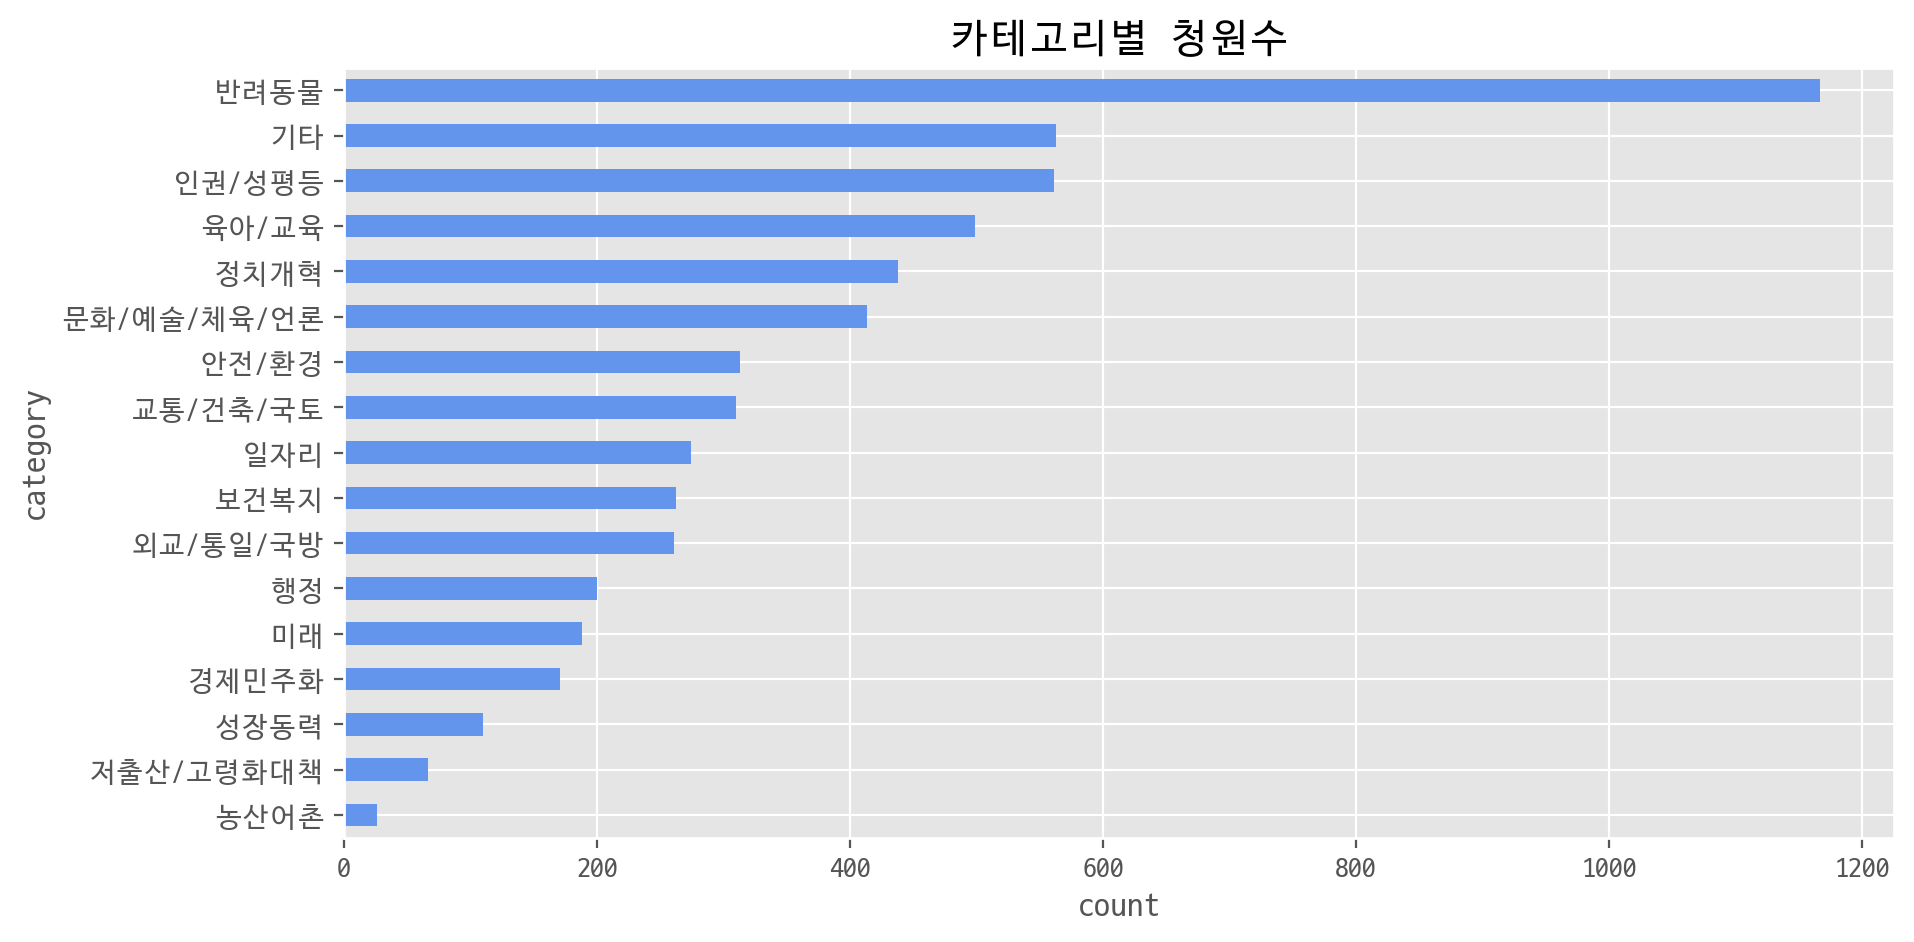

In [166]:
plt.style.use('ggplot')

grouped_pet.plot(kind='barh', figsize=(10, 5), width=0.5, color='cornflowerblue', legend=None)

plt.title('카테고리별 청원수')
plt.xlabel('count')
plt.ylabel('category')

plt.show()